# MOVIE GENRE CLASSIFICATION USING MACHINE LEARNING

 * Build a Machine learning model that predicts the genre of the movie based on its plot summary or other information

#### 1. Extract and Read Data

In [72]:
import pandas as pd
import zipfile

# Extracting the dataset from the provided zip files
with zipfile.ZipFile(r"C:\Users\shrav\Downloads\train_data.txt.zip") as zip_ref:
    zip_ref.extractall('/mnt/data/')
with zipfile.ZipFile(r"C:\Users\shrav\Downloads\test_data.txt.zip") as zip_ref:
    zip_ref.extractall('/mnt/data/')

train_data = pd.read_csv(r"C:\Users\shrav\Downloads\train_data.txt.zip", delimiter=':::', engine='python', names=['ID', 'TITLE', 'GENRE', 'DESCRIPTION'])
test_data = pd.read_csv(r"C:\Users\shrav\Downloads\test_data.txt.zip", delimiter=':::', engine='python', names=['ID', 'TITLE', 'DESCRIPTION'])


print("Training Data Head:")
print(train_data.head())

print("Testing Data Head:")
print(test_data.head())


Training Data Head:
   ID                               TITLE       GENRE  \
0   1       Oscar et la dame rose (2009)       drama    
1   2                       Cupid (1997)    thriller    
2   3   Young, Wild and Wonderful (1980)       adult    
3   4              The Secret Sin (1915)       drama    
4   5             The Unrecovered (2007)       drama    

                                         DESCRIPTION  
0   Listening in to a conversation between his do...  
1   A brother and sister with a past incestuous r...  
2   As the bus empties the students for their fie...  
3   To help their unemployed father make ends mee...  
4   The film's title refers not only to the un-re...  
Testing Data Head:
   ID                          TITLE  \
0   1          Edgar's Lunch (1998)    
1   2      La guerra de papá (1977)    
2   3   Off the Beaten Track (2010)    
3   4        Meu Amigo Hindu (2015)    
4   5             Er nu zhai (1955)    

                                         DESCRI

#### 2. EDA and Data visualization

In [73]:
train_data.isnull().sum()
test_data.isnull().sum()

ID             0
TITLE          0
DESCRIPTION    0
dtype: int64

In [74]:
train_data.isna().sum()
test_data.isna().sum()

ID             0
TITLE          0
DESCRIPTION    0
dtype: int64

In [75]:
train_data.describe()

,ID
count,54214.000000
mean,27107.500000
std,15650.378084
min,1.000000
25%,13554.250000
50%,27107.500000
75%,40660.750000
max,54214.000000


In [76]:
test_data.describe()

,ID
count,54200.000000
mean,27100.500000
std,15646.336632
min,1.000000
25%,13550.750000
50%,27100.500000
75%,40650.250000
max,54200.000000


In [77]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54214 entries, 0 to 54213
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ID           54214 non-null  int64 
 1   TITLE        54214 non-null  object
 2   GENRE        54214 non-null  object
 3   DESCRIPTION  54214 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.7+ MB


In [78]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54200 entries, 0 to 54199
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ID           54200 non-null  int64 
 1   TITLE        54200 non-null  object
 2   DESCRIPTION  54200 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.2+ MB


C:\Users\shrav\AppData\Local\Temp\ipykernel_10056\1602025054.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=train_data['GENRE'], order=genre_order, palette='viridis')


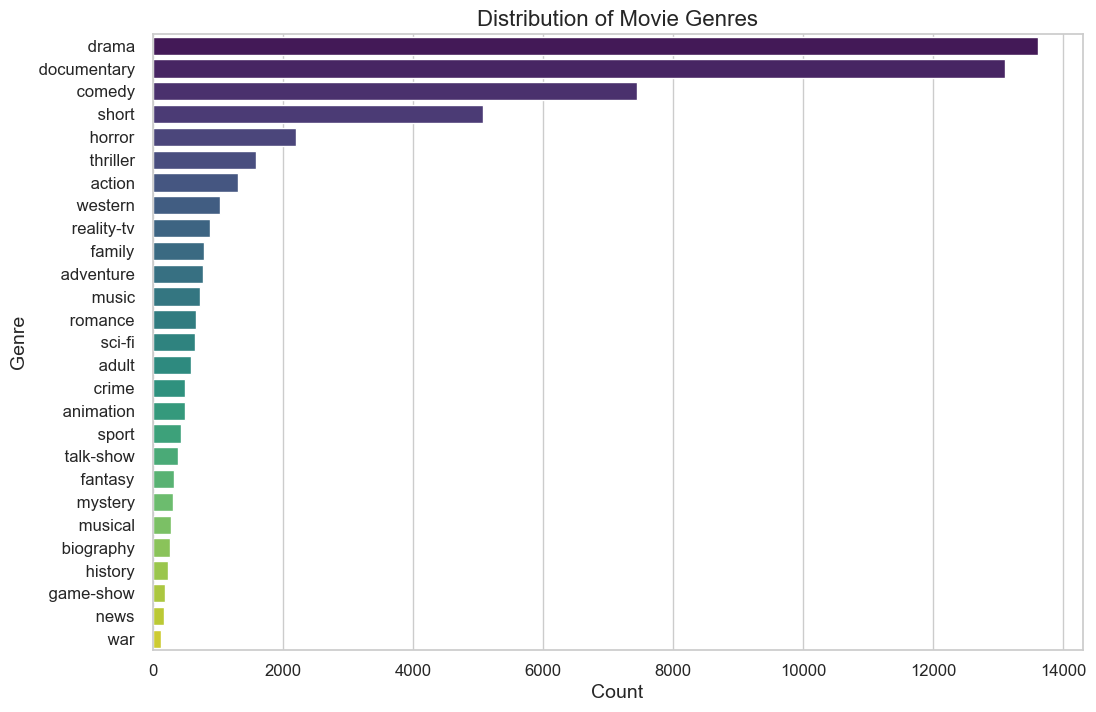

In [79]:
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Set Seaborn style
sns.set(style="whitegrid")

# Plot the distribution of movie genres
plt.figure(figsize=(12, 8))
genre_order = train_data['GENRE'].value_counts().index
sns.countplot(y=train_data['GENRE'], order=genre_order, palette='viridis')
plt.title('Distribution of Movie Genres', fontsize=16)
plt.xlabel('Count', fontsize=14)
plt.ylabel('Genre', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()


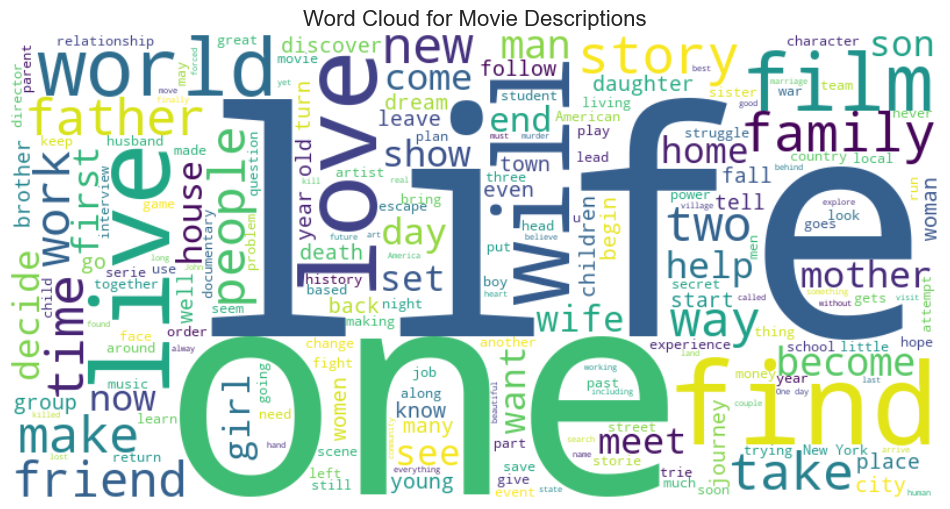

In [80]:
# Generate a word cloud for the descriptions
all_descriptions = ' '.join(train_data['DESCRIPTION'])
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate(all_descriptions)

plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Movie Descriptions', fontsize=16)
plt.show()

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\shrav\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
C:\Users\shrav\AppData\Local\Temp\ipykernel_10056\2537556680.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Frequency', y='Word', data=word_df, palette='viridis')


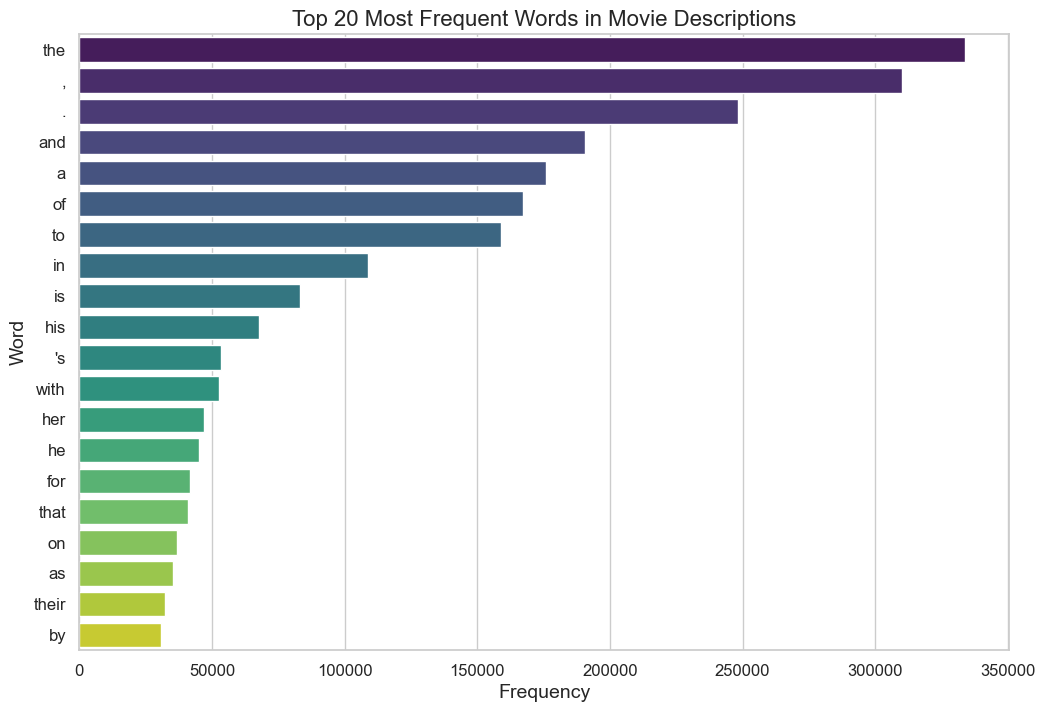

In [ ]:
# Show top 20 most frequent words
from collections import Counter
import nltk

words = nltk.word_tokenize(all_descriptions.lower())
word_freq = Counter(words)
common_words = word_freq.most_common(20)

word_df = pd.DataFrame(common_words, columns=['Word', 'Frequency'])

plt.figure(figsize=(12, 8))
sns.barplot(x='Frequency', y='Word', data=word_df, palette='viridis')
plt.title('Top 20 Most Frequent Words in Movie Descriptions', fontsize=16)
plt.xlabel('Frequency', fontsize=14)
plt.ylabel('Word', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

#### 3. Preprocess Data

In [82]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from nltk.stem import SnowballStemmer
from nltk.corpus import stopwords
import re
import nltk

# Initialize stemmer and stop words
stemmer = SnowballStemmer("english")
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    # Remove special characters and digits
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Convert to lower case
    text = text.lower()
    # Tokenize and remove stop words
    tokens = text.split()
    tokens = [word for word in tokens if word not in stop_words]
    # Stemming
    tokens = [stemmer.stem(word) for word in tokens]
    # Join tokens back into string
    return ' '.join(tokens)

# Apply preprocessing to plot summaries
train_data['cleaned_description'] = train_data['DESCRIPTION'].apply(preprocess_text)
test_data['cleaned_description'] = test_data['DESCRIPTION'].apply(preprocess_text)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\shrav\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [83]:
# Let the columns are 'cleaned_description' for text data and 'GENRE' for labels in the training data
X = train_data['cleaned_description']
y = train_data['GENRE']

In [84]:

# Encode labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

In [85]:
# Split the training data into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y_encoded, 
                                                  test_size=0.2, 
                                                  random_state=42)

In [86]:
# Vectorize the plot summaries using TF-IDF
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_val_tfidf = tfidf_vectorizer.transform(X_val)

#### 4. Build and Evaluate the Logistic Regression Model

In [87]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize the model
model = LogisticRegression(max_iter=1000)

# Perform cross-validation
cv_scores = cross_val_score(model, X_train_tfidf, y_train, cv=5, scoring='accuracy')

print(f"Cross-validation scores: {cv_scores}")
print(f"Mean cross-validation score: {cv_scores.mean()}")

In [ ]:
# Train the model on the full training data
model.fit(X_train_tfidf, y_train)

# Validate the model
y_val_pred = model.predict(X_val_tfidf)
val_accuracy = accuracy_score(y_val, y_val_pred)

print(f"Validation Accuracy: {val_accuracy}")
print("Classification Report:")
print(classification_report(y_val, y_val_pred, target_names=label_encoder.classes_))

In [ ]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_val, y_val_pred)
plt.figure(figsize=(12, 8))
sns.heatmap(conf_matrix, annot=True,cmap = 'Spectral', fmt='d', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix', fontsize = 15)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.xticks(rotation=45, fontsize=12)
plt.yticks(rotation=0, fontsize=12)
plt.show()

#### 5. Make Predictions on Test Data

In [ ]:
# Preprocess the test data
X_test = test_data['cleaned_description']
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Predict genres for the test data
y_test_pred = model.predict(X_test_tfidf)

# Convert numeric predictions back to original labels
y_test_pred_labels = label_encoder.inverse_transform(y_test_pred)

# Add predictions to the test data
test_data['predicted_genre'] = y_test_pred_labels

print("Test Data with Predictions:")
print(test_data.head())


#### 6. Visualize Results

In [ ]:
# Display a sample of the test data with predictions
sample_results = test_data[['ID', 'TITLE', 'DESCRIPTION', 'predicted_genre']].head(10)
print("Sample Predictions on Test Data:")
pd.DataFrame(sample_results)